# Segmentação de Clientes de um E-commerce com Clusters

## Problema
Segmentar clientes de um E-commerce através de clusters.

## Tarefas
1. Carregar e preparar o dataset, preprocessar os dados.
2. Construir uma rede neural CNN e treiná-la.
3. Avaliar o modelo no conjunto de teste.
---
### Importe as Bibliotecas

In [3]:
import sklearn as sk
from sklearn import preprocessing,cluster,metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

---
## Carregamento do Dataset

In [4]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1")
# Verificar informações do DataFrame  
df.info()
df.shape
df.head(10)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


---
## Pré-processamento dos Dados


In [5]:
df['Amount']=df['UnitPrice']*df['Quantity']
df.isna().sum()
df.dropna(inplace=True)
# Selecionar características relevantes para clustering  
# Exemplo: usando 'Amount' e 'Frequency'
X=df.groupby(['CustomerID']).agg({'Amount':'sum'})
X['Frequency']=df['CustomerID'].value_counts()
# Tirar Outliers
# Cálculo do Z-score  
z_scores = np.abs(stats.zscore(X))  
X = X[(z_scores < 2).all(axis=1)]  
# Normalizar os dados  
scaler = sk.preprocessing.StandardScaler()  
X_scaled = scaler.fit_transform(X)   

For n_clusters = 3 Silhouette_score is: 0.6439993555353636 , Inertia: 2555.230583871431 Davies-Bouldin 0.8106967989771322 and CH_index 5025.476662103635


For n_clusters = 4 Silhouette_score is: 0.5921957511558437 , Inertia: 1809.5572208913159 Davies-Bouldin 0.8105117662174783 and CH_index 5317.136089296184


For n_clusters = 5 Silhouette_score is: 0.5189506899786829 , Inertia: 1501.5853073123237 Davies-Bouldin 0.8908257532584294 and CH_index 5023.924405393431


For n_clusters = 6 Silhouette_score is: 0.508833526852477 , Inertia: 1261.2605804211207 Davies-Bouldin 0.8353424155988586 and CH_index 4946.618391331824


For n_clusters = 7 Silhouette_score is: 0.4605251782521488 , Inertia: 1113.2507027348406 Davies-Bouldin 0.9093044562602898 and CH_index 4763.92060265415


For n_clusters = 8 Silhouette_score is: 0.47449965024663115 , Inertia: 962.7763527133266 Davies-Bouldin 0.8923019560613479 and CH_index 4815.893312482395


For n_clusters = 9 Silhouette_score is: 0.4487059003983217 , Inertia: 863.2903957063869 Davies-Bouldin 0.8881865908553574 and CH_index 4759.864761664253


---
## Escolher o número de clusters 

In [6]:
inertias = []  
for i in range (2,10):
    kmeans = sk.cluster.KMeans(n_clusters=i,random_state=42)  
    kmeans.fit(X_scaled) 
    score = sk.metrics.silhouette_score(X_scaled, kmeans.labels_)
    db_index = sk.metrics.davies_bouldin_score(X_scaled, kmeans.labels_)
    ch_index = sk.metrics.calinski_harabasz_score(X_scaled, kmeans.labels_)
    inertias.append(kmeans.inertia_) 
    print("For n_clusters =", i, "Silhouette_score is:", score,', Inertia:',kmeans.inertia_,
          "Davies-Bouldin",db_index,"and CH_index",ch_index)

For n_clusters = 2 Silhouette_score is: 0.7102633223229219 , Inertia: 3766.6423993395574 Davies-Bouldin 0.7075749157389952 and CH_index 5444.101574182065
For n_clusters = 3 Silhouette_score is: 0.6439993555353636 , Inertia: 2555.230583871431 Davies-Bouldin 0.8106967989771322 and CH_index 5025.476662103635
For n_clusters = 4 Silhouette_score is: 0.5921957511558437 , Inertia: 1809.5572208913159 Davies-Bouldin 0.8105117662174783 and CH_index 5317.136089296184
For n_clusters = 5 Silhouette_score is: 0.5189506899786829 , Inertia: 1501.5853073123237 Davies-Bouldin 0.8908257532584294 and CH_index 5023.924405393431
For n_clusters = 6 Silhouette_score is: 0.508833526852477 , Inertia: 1261.260580421121 Davies-Bouldin 0.8353424155988586 and CH_index 4946.618391331824
For n_clusters = 7 Silhouette_score is: 0.4605251782521488 , Inertia: 1113.2507027348406 Davies-Bouldin 0.9093044562602898 and CH_index 4763.92060265415
For n_clusters = 8 Silhouette_score is: 0.47449965024663115 , Inertia: 962.77635

---
## Método do Cotovelo

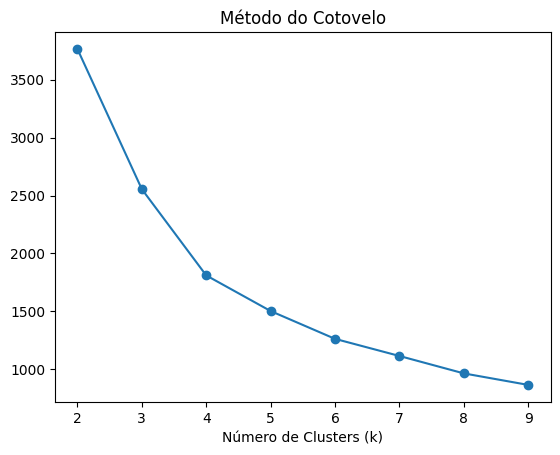

In [7]:
# Plotar o gráfico do cotovelo  
plt.plot(range(2, 10), inertias, marker='o')  
plt.title('Método do Cotovelo')  
plt.xlabel('Número de Clusters (k)')  
plt.show()  

---
## Treinamento Final do KMeans

In [8]:
kmeans = sk.cluster.KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_scaled) 

KMeans(n_clusters=4, random_state=42)

---
## Visualização dos Clusters (Valores Escalados)

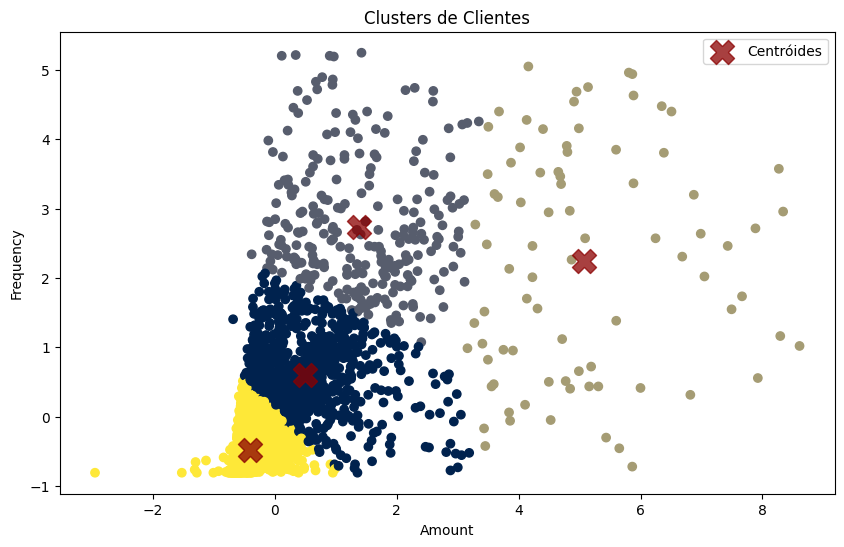

In [9]:
X['Cluster'] = kmeans.labels_  
clusters = kmeans.labels_
# Visualização
centroids = kmeans.cluster_centers_   
plt.figure(figsize=(10, 6))  
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='cividis') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='darkred', s=300, alpha=0.75, marker='X', label='Centróides')    
# Adicionar título e rótulos  
plt.title('Clusters de Clientes')  
plt.xlabel('Amount')  
plt.ylabel('Frequency')  
plt.legend()  
plt.show()  

---
## Visualização dos Clusters (Valores Originais)

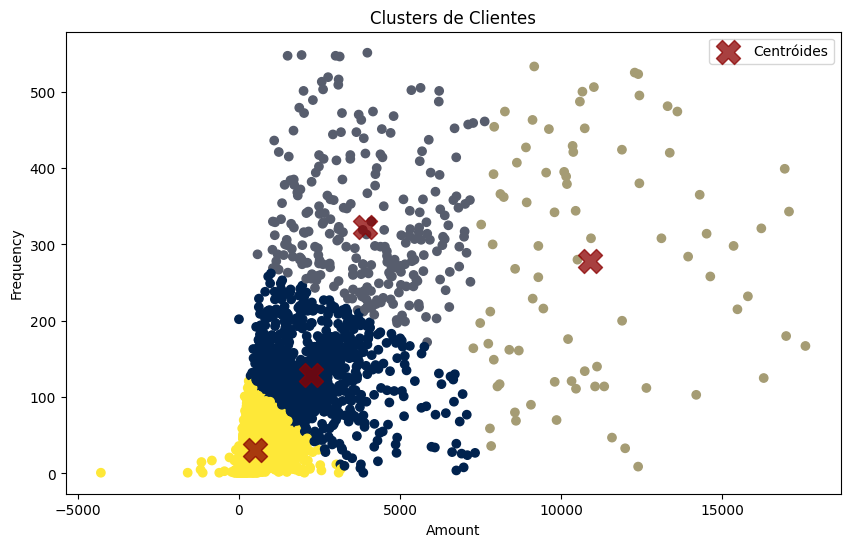

In [10]:
#Visualização 
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
plt.figure(figsize=(10, 6))  
plt.scatter(X['Amount'], X['Frequency'], c=X['Cluster'], cmap='cividis') 
plt.scatter(centroids[[0]], centroids[[1]], c='darkred', s=300, alpha=0.75, marker='X', label='Centróides')    
# Adicionar título e rótulos  
plt.title('Clusters de Clientes')  
plt.xlabel('Amount')  
plt.ylabel('Frequency')  
plt.legend()  
plt.savefig('Clusters de Clientes')
plt.show()  